<a href="https://colab.research.google.com/github/lukassso/python-mini-projects/blob/master/MNIST_MLP%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.callbacks import EarlyStopping
from IPython.display import Image

2025-04-24 14:34:33.699840: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-24 14:34:33.755965: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-24 14:34:33.805854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745498073.851605   43047 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745498073.864624   43047 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745498073.958898   43047 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
#(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
X_train = (X_train / 255).astype('float32')
X_test = (X_test / 255).astype('float32')

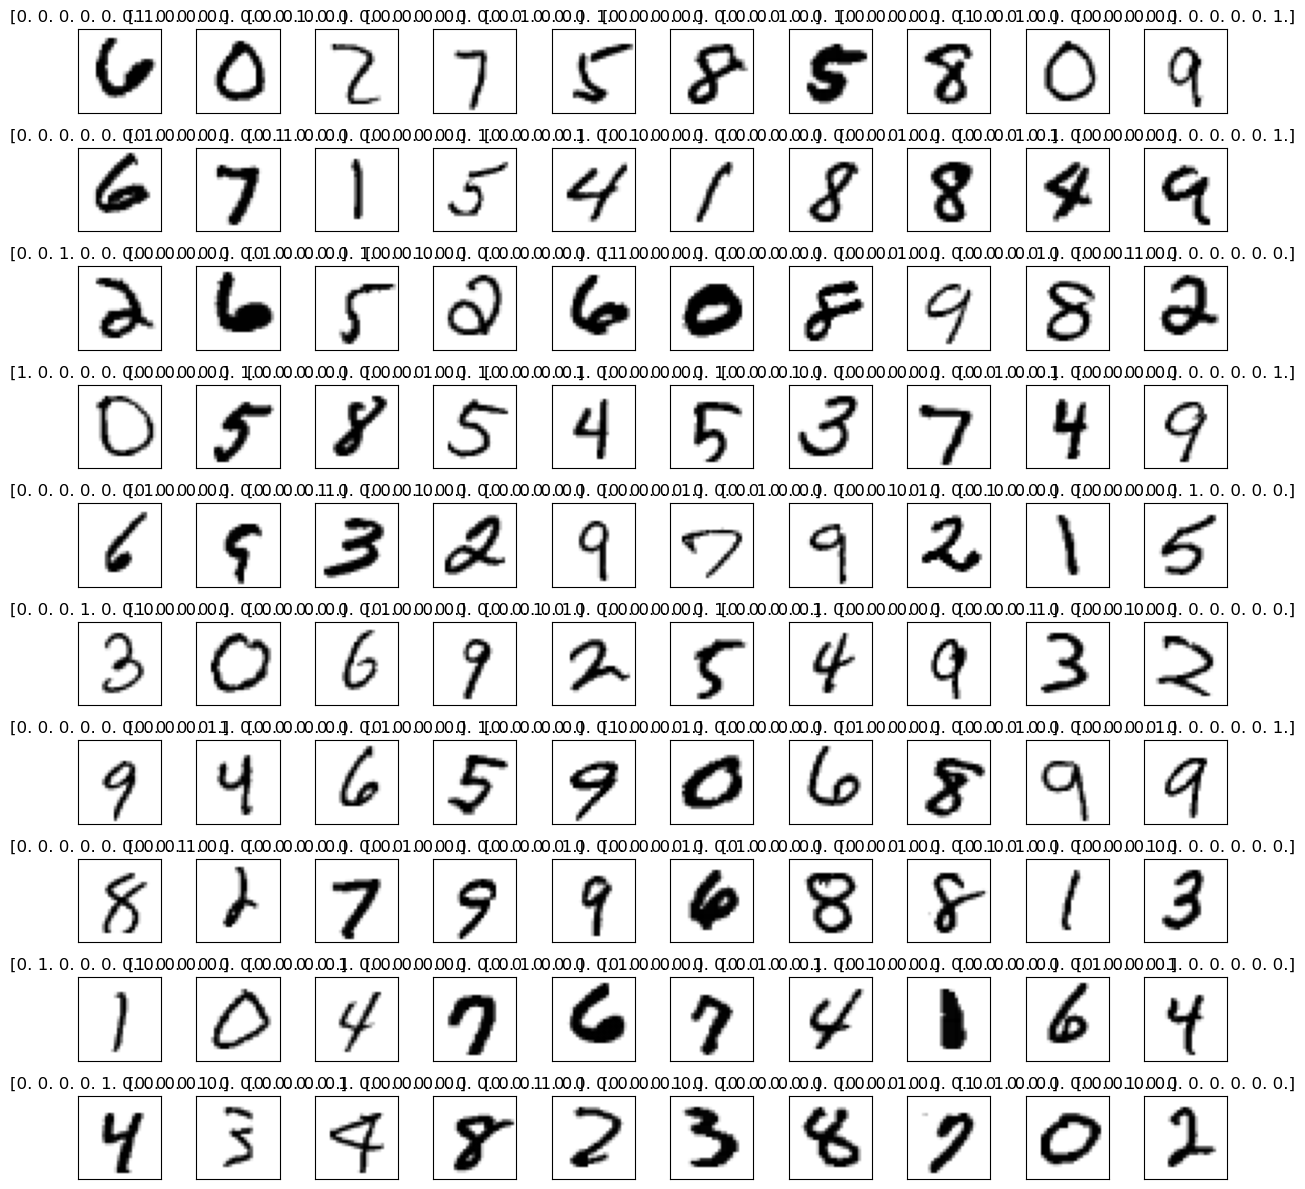

In [9]:
fig, ax = plt.subplots(10, 10, figsize=(12, 12))
k = 0
ind = np.random.randint(60000, size=100)
for i in range(10):
  for j in range(10):
    n = ind[k]
    ax[i, j].imshow(X_train[n], cmap='gray_r')
    ax[i, j].axes.get_xaxis().set_ticks([])
    ax[i, j].axes.get_yaxis().set_ticks([])
    ax[i, j].set_title('{}'.format(y_train[n]))
    k += 1
fig.tight_layout()

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
model_1 = Sequential()
model_1.add(Input(shape=(28, 28)))
model_1.add(Flatten(name='Flatten'))
model_1.add(Dense(100, activation='swish', name='Input'))
model_1.add(Dense(10, activation='softmax', name='Output'))
model_1.summary()
plot_model(model_1, to_file='model_1.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)
Image(filename='model_1.png', width=480)

2025-04-24 14:34:39.819225: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Input (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'model_1.png'

In [ ]:
model_1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
fit_1=model_1.fit(X_train, y_train,
                  batch_size=256,
                  epochs=50,
                  validation_data=(X_test, y_test),
                  callbacks=[es])


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8103 - loss: 0.7196 - val_accuracy: 0.9210 - val_loss: 0.2794
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9277 - loss: 0.2591 - val_accuracy: 0.9403 - val_loss: 0.2054
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9409 - loss: 0.2012 - val_accuracy: 0.9496 - val_loss: 0.1721
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.1534 - val_accuracy: 0.9596 - val_loss: 0.1396
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9632 - loss: 0.1263 - val_accuracy: 0.9646 - val_loss: 0.1190
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9705 - loss: 0.1003 - val_accuracy: 0.9660 - val_loss: 0.1140
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9738 - loss: 0.0902 - val_accuracy: 0.9690 - val_loss: 0.1034
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9775 - loss: 0.0778 - val_accuracy: 0.

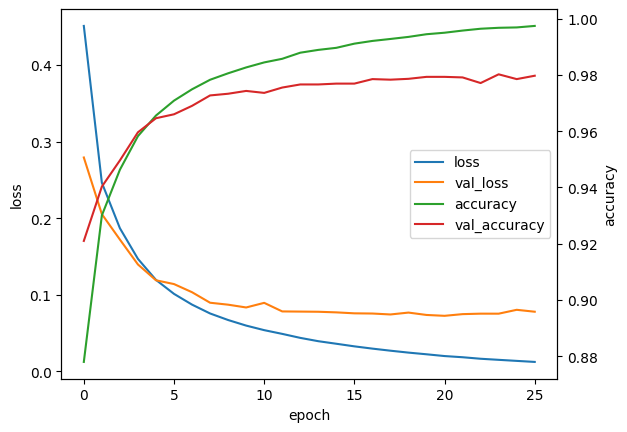

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1, = ax1.plot(fit_1.history['loss'], '-', color='C0', label='loss')
l2, = ax1.plot(fit_1.history['val_loss'], '-', color='C1', label='val_loss')
l3, = ax2.plot(fit_1.history['accuracy'], '-', color='C2', label='accuracy')
l4, = ax2.plot(fit_1.history['val_accuracy'], '-', color='C3', label='val_accuracy')
ax1.set_xlabel("epoch")
ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')
plt.legend(handles=[l1, l2, l3, l4], loc='center right');

In [ ]:
model_1.evaluate(X_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9967 - loss: 0.0154


[0.015472479164600372, 0.9968666434288025]

In [ ]:
model_1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0836


[0.07253678888082504, 0.9793000221252441]

In [ ]:
y_test_pred = fit_1.model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


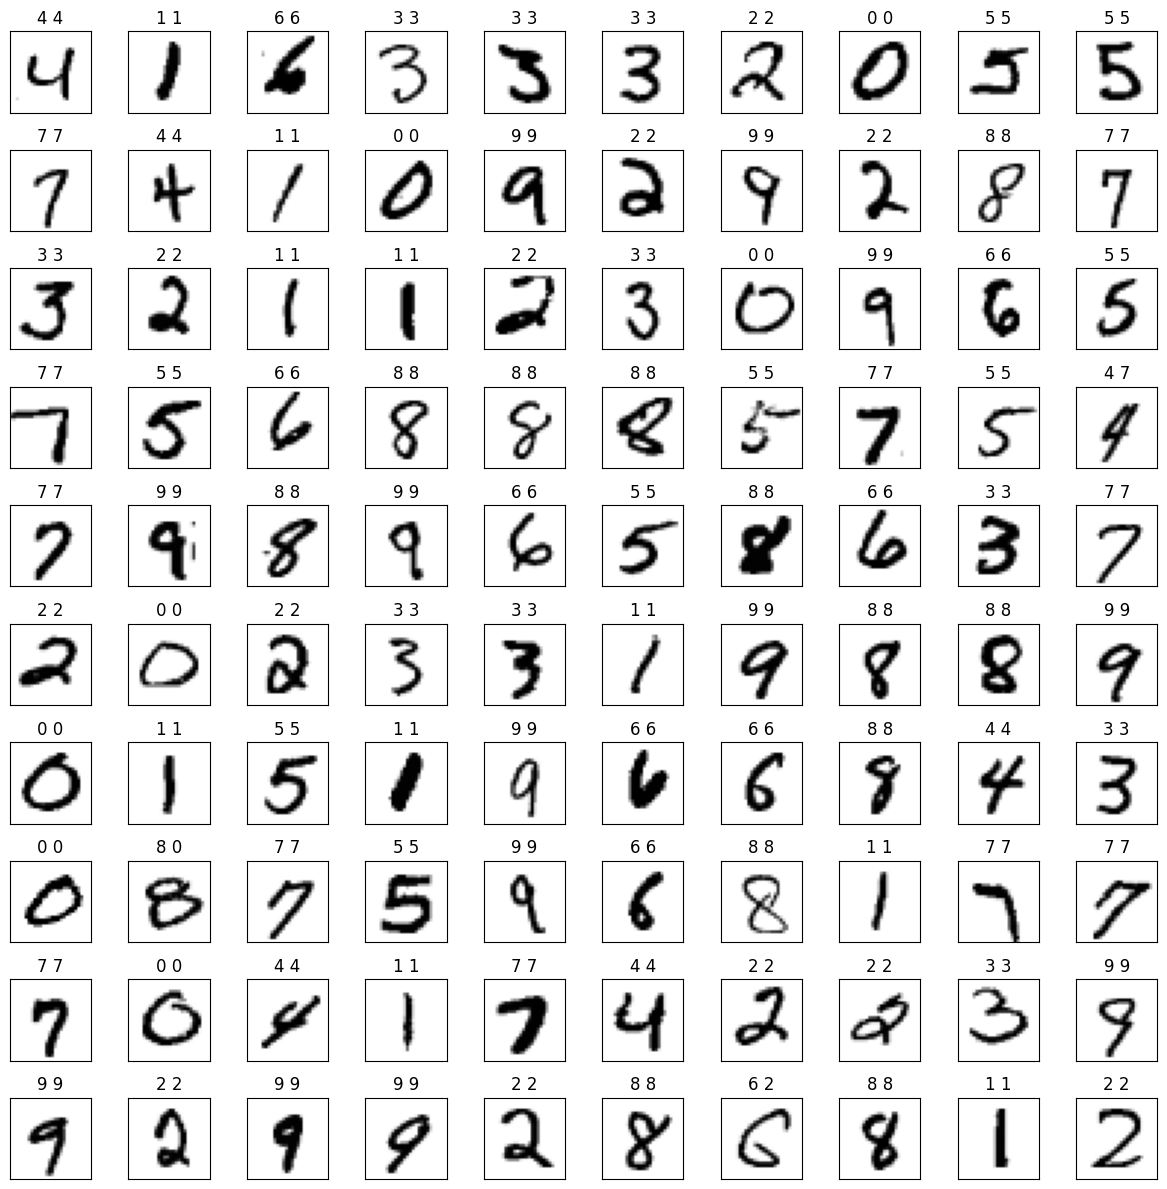

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(12, 12))
k = 0
ind = np.random.randint(10000, size=100)
for i in range(10):
  for j in range(10):
    n = ind[k]
    ax[i, j].imshow(X_test[n], cmap='gray_r')
    ax[i, j].axes.get_xaxis().set_ticks([])
    ax[i, j].axes.get_yaxis().set_ticks([])
    ax[i, j].set_title('{} {}'.format(y_test[n].argmax(), y_test_pred[n].argmax()))
    k += 1
fig.tight_layout()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 28, 28, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_1 (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_1 (MaxPooling2D)     │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_2 (MaxPooling2D)     │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 100)            │        80,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,682 (354.23 KB)

 Trainable params: 90,680 (354.22 KB)

 Non-trainable params: 2 (8.00 B)

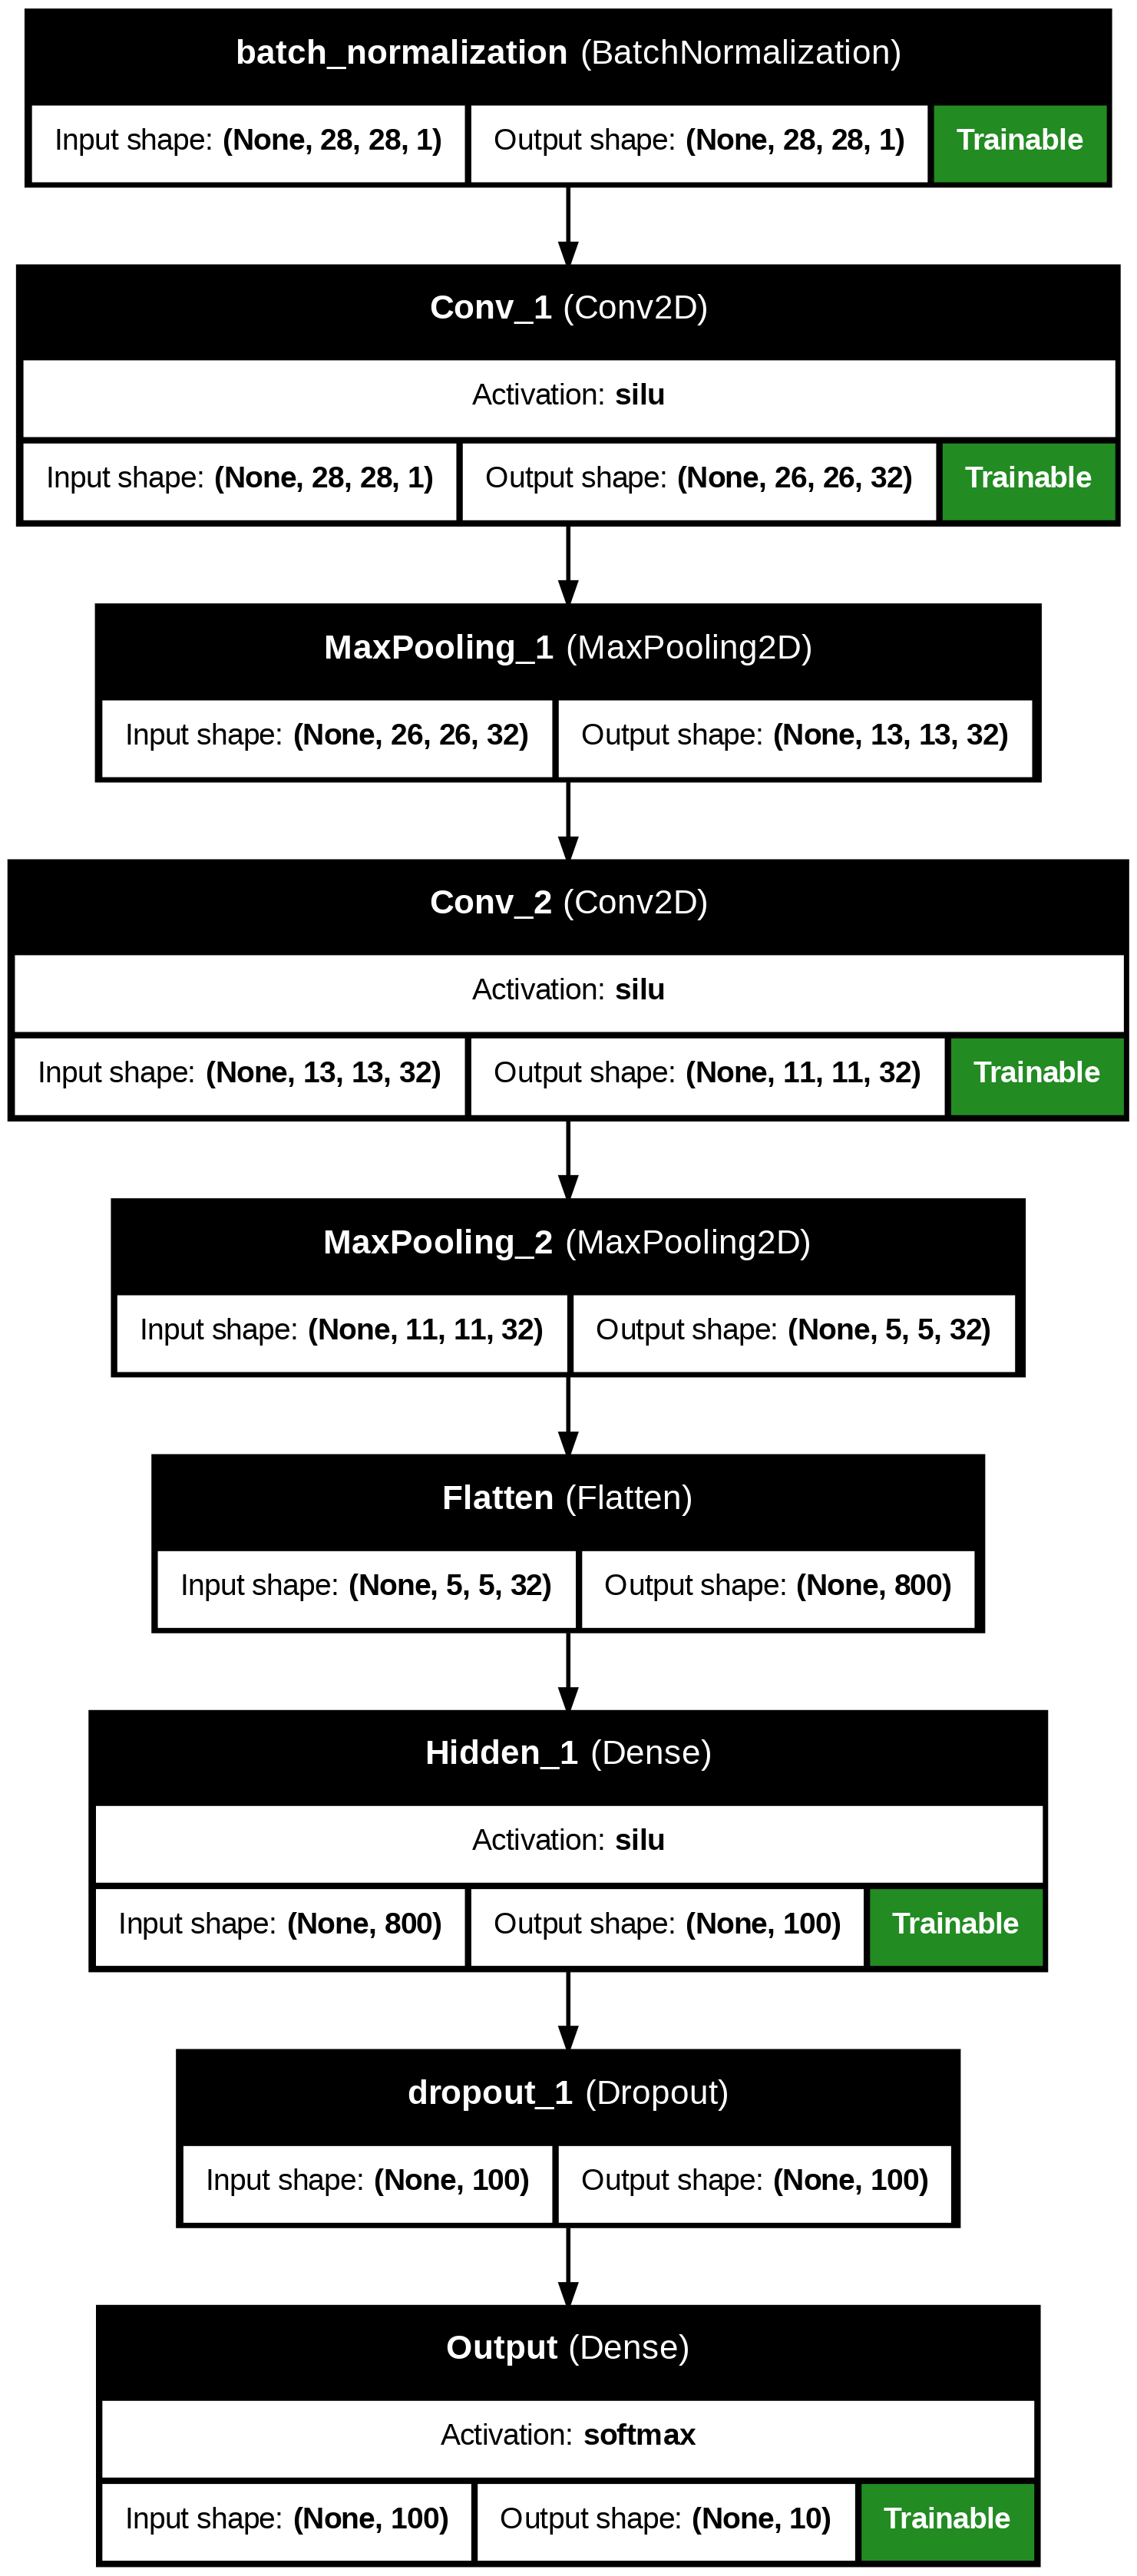

In [ ]:
model_2 = Sequential()
model_2.add(Input(shape=(28, 28, 1)))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, kernel_size=(3, 3), activation='swish', name='Conv_1'))
model_2.add(MaxPooling2D((2, 2), name='MaxPooling_1'))
model_2.add(Conv2D(32, kernel_size=(3, 3), activation='swish', name='Conv_2'))
model_2.add(MaxPooling2D(pool_size=(2, 2), name='MaxPooling_2'))
model_2.add(Flatten(name='Flatten'))
model_2.add(Dense(100, activation='swish', name='Hidden_1'))
model_2.add(Dropout(0.3))
#model_2.add(Dense(30, activation='swish', name='Hidden_2'))
model_2.add(Dense(10, activation='softmax', name='Output'))
model_2.summary()
plot_model(model_2, to_file='model_2.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)
Image(filename='model_2.png', width=480)

In [ ]:
model_2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
fit_2=model_2.fit(X_train, y_train,
                  batch_size=256,
                  epochs=50,
                  validation_data=(X_test, y_test),
                  callbacks=[es])

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8234 - loss: 0.5706 - val_accuracy: 0.9781 - val_loss: 0.0950
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9758 - loss: 0.0818 - val_accuracy: 0.9876 - val_loss: 0.0374
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9837 - loss: 0.0523 - val_accuracy: 0.9902 - val_loss: 0.0294
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9877 - loss: 0.0391 - val_accuracy: 0.9906 - val_loss: 0.0300
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.9900 - val_loss: 0.0313
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9922 - loss: 0.0268 - val_accuracy: 0.9864 - val_loss: 0.0395
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9924 - val_loss: 0.0232
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0

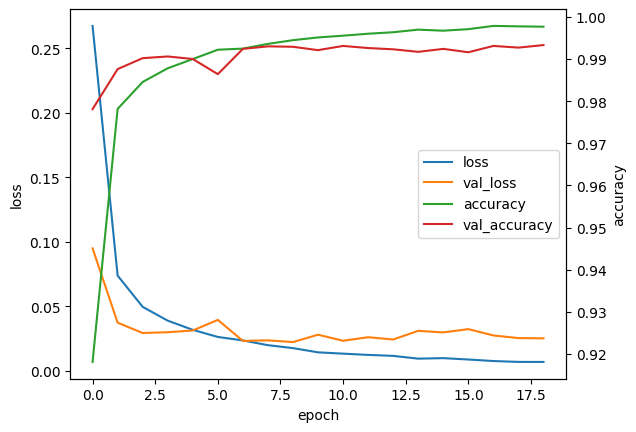

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1, = ax1.plot(fit_2.history['loss'], '-', color='C0', label='loss')
l2, = ax1.plot(fit_2.history['val_loss'], '-', color='C1', label='val_loss')
l3, = ax2.plot(fit_2.history['accuracy'], '-', color='C2', label='accuracy')
l4, = ax2.plot(fit_2.history['val_accuracy'], '-', color='C3', label='val_accuracy')
ax1.set_xlabel("epoch")
ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')
plt.legend(handles=[l1, l2, l3, l4], loc='center right');

In [ ]:
model_2.evaluate(X_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9980 - loss: 0.0077


[0.007864922285079956, 0.9979666471481323]

In [ ]:
model_2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0284


[0.022333426401019096, 0.992900013923645]

In [ ]:
y_test_pred = fit_2.model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


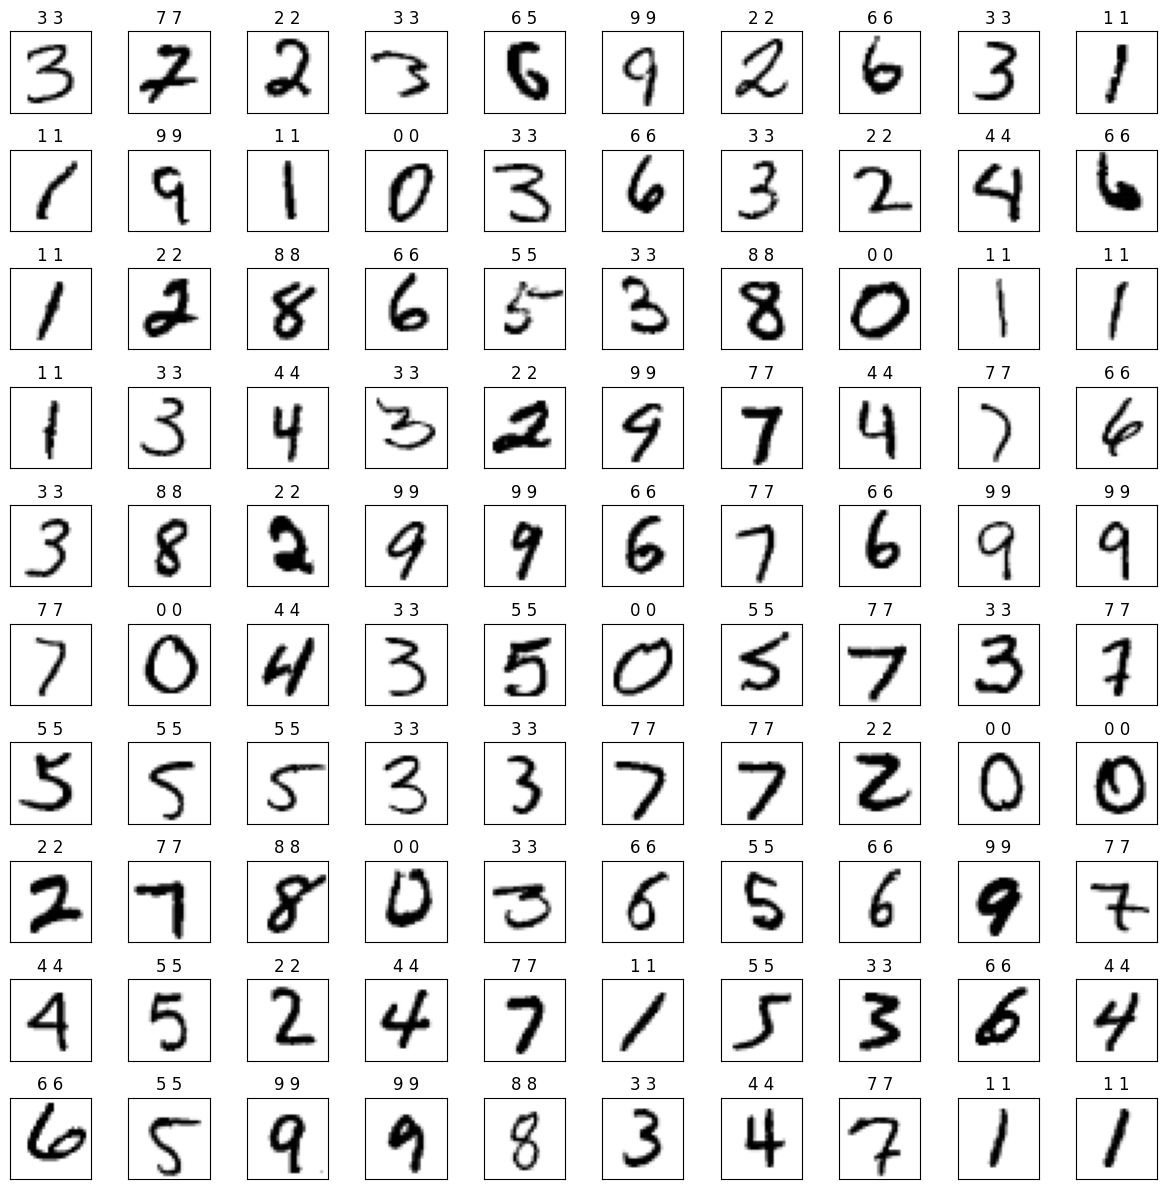

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(12, 12))
k = 0
ind = np.random.randint(10000, size=100)
for i in range(10):
  for j in range(10):
    n = ind[k]
    ax[i, j].imshow(X_test[n], cmap='gray_r')
    ax[i, j].axes.get_xaxis().set_ticks([])
    ax[i, j].axes.get_yaxis().set_ticks([])
    ax[i, j].set_title('{} {}'.format(y_test[n].argmax(), y_test_pred[n].argmax()))
    k += 1
fig.tight_layout()